### Integrantes:
- Diego Alegre
- Martín De Lojo

### 1. Programar eficientemente el cálculo de la pendiente y de la ordenada al origen para el método de cuadrados mínimos a partir de n puntos. No hacer operaciones de más o redundantes.

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
def datos():
    df = pd.read_excel('datos.xlsx')
    df = df.dropna(axis=1, how='all')
    df = df.dropna(axis=0, how='all')
    df.drop(index=3, inplace=True)
    df.reset_index(drop=True, inplace=True)
    df.rename(columns={'Unnamed: 2': 'dia', 'Unnamed: 3': 'acumulado'}, inplace=True)

    x = df["dia"].astype(float).values
    y = df["acumulado"].astype(float).values
    return x, y

def regresionLineal(x, y):
    n = len(x)
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    sum_xx = np.sum(x * x)
    sum_xy = np.sum(x * y)

    a = ((n*sum_xy) - (sum_x*sum_y)) / ((n*sum_xx)-(sum_x**2))
    b = (sum_y- (a*sum_x))/n
    return a, b

def rectaPrediccion(a, b, x):
    y2 = [a * xi + b for xi in x]
    return y2

def error(a, b, x, y):
    error = np.sum(((a * x) + b - y) ** 2)
    return error

### 2. Usar los datos del archivo Excel que aparece en la unidad, aplicar lo anterior y calcular, y por último graficar los puntos y la recta obtenida.

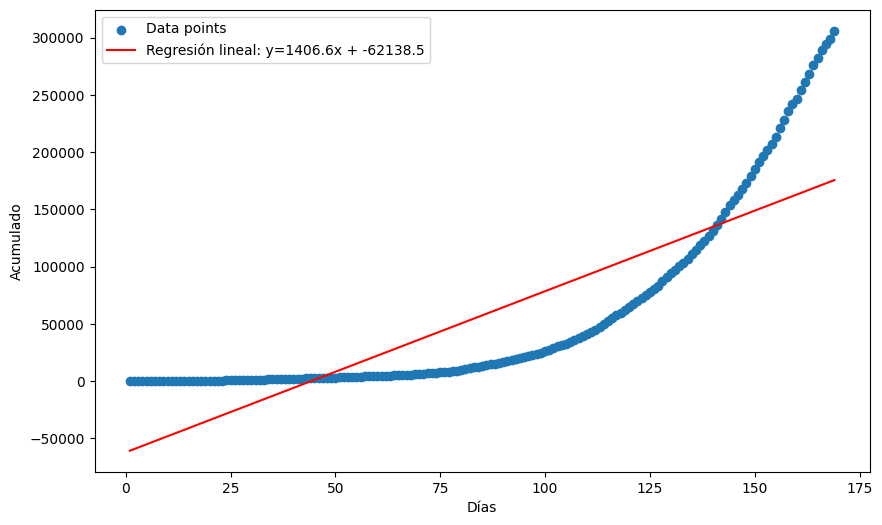

In [3]:
def graficar(x, y, y2, a, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data points')
    plt.plot(x, y2, color='red', label=f'Regresión lineal: y={a.round(1)}x + {b.round(1)}')
    plt.xlabel('Días')
    plt.ylabel('Acumulado')
    plt.legend()
    plt.show()

x, y = datos()
a, b = regresionLineal(x, y)
y2 = rectaPrediccion(a, b, x)
graficar(x, y, y2, a, b)

### 3. Sobre los mismos datos, ajustar una curva de la forma y = b*e^(ax), convirtiéndola previamente en lineal y aplicando luego regresión lineal. Comparar de alguna forma la curva obtenida con la anterior.

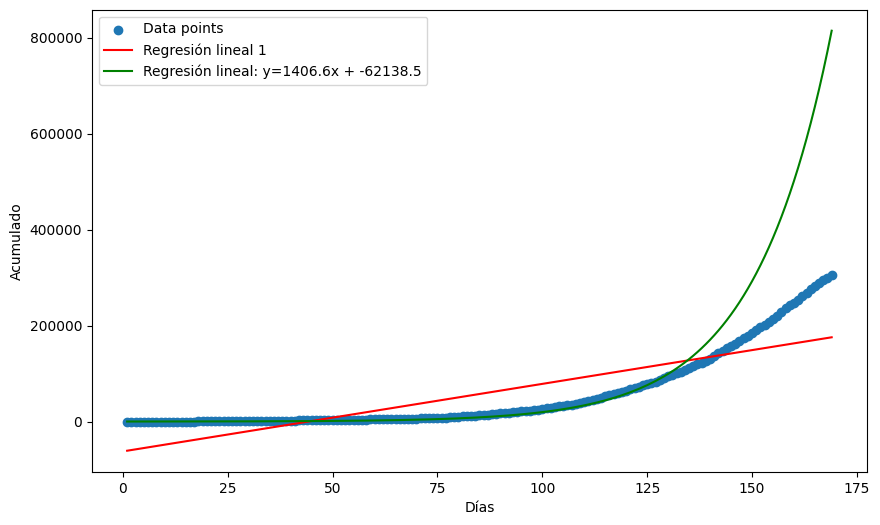

343911179945.8664
343911179945.8664


In [4]:
def graficarComparacion(x, y, y2, y3, a, b):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label='Data points')
    plt.plot(x, y2, color='red', label='Regresión lineal 1')
    plt.plot(x, y3, color='green', label=f'Regresión lineal: y={a.round(1)}x + {b.round(1)}')
    plt.xlabel('Días')
    plt.ylabel('Acumulado')
    plt.legend()
    plt.show()

y_log = np.log(y)
modelo_regresion = LinearRegression()
modelo_regresion.fit(x.reshape(-1, 1), y_log)

a_reg = modelo_regresion.coef_[0]
b_reg = modelo_regresion.intercept_

b_reg_norm = np.exp(b_reg)

recta_exp = b_reg_norm * np.exp(a_reg * x)

e1 = error(a, b, x, y)

# a, b = regresionLinealLog(x, y_log)
# y2_log = rectaPrediccionLog(a, b, x)
graficarComparacion(x, y, y2, recta_exp, a, b)

e2 = error(a, b, x, y)

print(e1)
print(e2)
